# Body Performance

## Download the data
This is a data from kaggle's ["Body Performance"](https://www.kaggle.com/datasets/kukuroo3/body-performance-data), which provide 12 body performance features and a final body class level(A,B,C,D).

In [1]:
import pandas as pd
#read the data
data = pd.DataFrame(pd.read_csv('bodyPerformance.csv'))

## Preprocessing
1. Find and deal with missing value
2. Deal with category feature
3. Transpose the ordinal targets to ordinal number
4. Detect outlier and change it
5. Generate new features
6. Standardize the numeric features
7. Split the data into train and test set

### Missing Value
Using "missingno matrix" to visualize the missing data location.

You should consider upgrading via the 'c:\Users\ryan840919\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


<AxesSubplot:>

<Figure size 504x360 with 0 Axes>

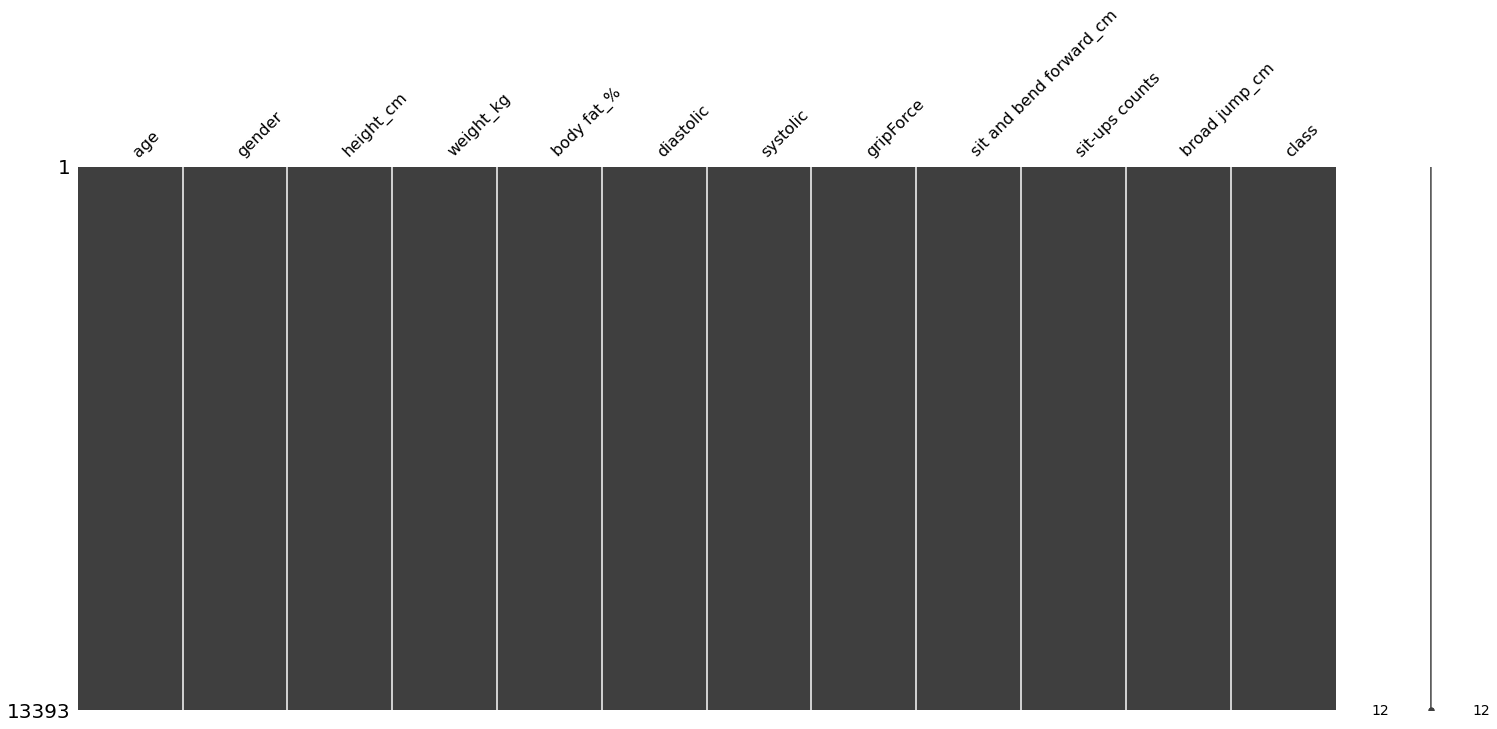

In [2]:
%pip install missingno
import missingno as msno
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
msno.matrix(data)

### Dummy Variable
Using "get_dummies" to vectorize the category data "gender", there is another way of doing this ["OneHotEncoder"](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html), it has different characteristic which will not discussed here.

In [3]:
genderdum = pd.get_dummies(data.gender)
genderdum.head()

,F,M
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


### Ordinal Targets
Replacing our class target [A,B,C,D] to ordinal numbers [1,2,3,4], can't see the difference between this and ["OrdinalEncoder"](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html).

In [4]:
classord = data[['class']].replace(['A','B','C','D'],[1,2,3,4])
classord.head()

,class
0,3
1,1
2,3
3,2
4,2


### Outlier Detection
Use ["tukey iqr"](https://zh.m.wikipedia.org/zh-tw/%E7%AE%B1%E5%BD%A2%E5%9C%96) to detect the outlier, the value bigger than q3+1.5*iqr or smaller than q1-1.5*iqr will be seen as a outlier. We deal with outliers by using ["Winsorizing"](https://en.wikipedia.org/wiki/Winsorizing) method, replace outlier with the threshold value.

In [5]:
import numpy as np
def outdet(columns):
    q1 = np.percentile(columns,25)
    q3 = np.percentile(columns,75)
    iqr = q3-q1
    floor = q1 - 1.5*iqr
    roof = q3 + 1.5*iqr
    # new way to form a list
    outindex = list(columns.index[(columns < floor)|(columns > roof)])
    outvalue = list(columns[outindex])
    outlist = []
    for i in range(len(outvalue)):
        outlist.append([outindex[i],outvalue[i]])
    for i in outlist:
        if i[1] < floor:
            columns[i[0]] = floor
            # print(i[0],columns[i[0]])
        if i[1] > roof:
            columns[i[0]] = roof
            # print(i[0],columns[i[0]])

In [6]:
#drop gender and class first
datadrop = data.drop(['gender','class'], axis=1)

for _,i in datadrop.iteritems():
    outdet(i)

### Interatction Features
Generating new features with old features, observe whether there are some improvement. We use ["PolynomialFeatures"](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) to achieve this.

In [7]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2,interaction_only=True,include_bias=False)
test = poly.fit_transform(datadrop)
newdatadrop = pd.DataFrame(data=test,columns=poly.get_feature_names_out(datadrop.columns))
newdatadrop.head()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,...,systolic gripForce,systolic sit and bend forward_cm,systolic sit-ups counts,systolic broad jump_cm,gripForce sit and bend forward_cm,gripForce sit-ups counts,gripForce broad jump_cm,sit and bend forward_cm sit-ups counts,sit and bend forward_cm broad jump_cm,sit-ups counts broad jump_cm
0,27.0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,...,7137.0,2392.0,7800.0,28210.0,1010.16,3294.0,11913.3,1104.0,3992.8,13020.0
1,25.0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,...,4586.4,2053.8,6678.0,28854.0,593.32,1929.2,8335.6,863.9,3732.7,12137.0
2,31.0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,...,6809.6,1824.0,7448.0,27512.0,537.60,2195.2,8108.8,588.0,2172.0,8869.0
3,32.0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,...,6085.8,2234.4,7791.0,32193.0,629.28,2194.2,9066.6,805.6,3328.8,11607.0
4,28.0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,...,5524.5,3441.7,5715.0,27559.0,1178.85,1957.5,9439.5,1219.5,5880.7,9765.0


### Standardization
Standardize the numeric features.

In [26]:
from sklearn.preprocessing import StandardScaler
#standardize
sc = StandardScaler()
newdatadropstdtest = sc.fit_transform(newdatadrop)
newdatadropstd = pd.DataFrame(newdatadropstdtest, columns = newdatadrop.columns)

### Concat matrix
Concat the dummy variable and the rest features.

In [27]:
#concat the dummied gender
datafeature = pd.concat([genderdum,newdatadropstd], axis=1)
datafeature.head()

,F,M,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,...,systolic gripForce,systolic sit and bend forward_cm,systolic sit-ups counts,systolic broad jump_cm,gripForce sit and bend forward_cm,gripForce sit-ups counts,gripForce broad jump_cm,sit and bend forward_cm sit-ups counts,sit and bend forward_cm broad jump_cm,sit-ups counts broad jump_cm
0,0,1,-0.717432,0.444082,0.663741,-0.267087,0.112277,-0.016197,1.688286,0.397959,...,1.410414,0.402218,1.316347,0.540942,1.441296,2.099588,1.420365,1.175969,0.675173,1.302633
1,0,1,-0.864220,-0.423312,-0.983292,-1.045934,-0.170249,-0.290824,-0.053097,0.124824,...,-0.168601,0.065954,0.750116,0.645074,0.116271,0.449347,0.307557,0.580521,0.510919,1.074011
2,0,1,-0.423857,1.311477,0.897579,-0.433983,1.242382,1.494252,0.737585,-0.434454,...,1.207729,-0.162530,1.138706,0.428078,-0.060848,0.770980,0.237013,-0.103711,-0.474673,0.227878
3,0,1,-0.350463,0.705489,0.312984,-0.670418,-0.264425,1.150968,0.417547,-0.018247,...,0.759642,0.245520,1.311805,1.184976,0.230578,0.769770,0.534927,0.435937,0.255853,0.936787
4,0,1,-0.644038,0.622314,0.024923,-0.851222,-0.829477,-0.222167,0.615218,1.529520,...,0.412154,1.445909,0.264126,0.435678,1.977517,0.483566,0.650914,1.462409,1.867394,0.459866


### Split the data
Split the data into train and test set.

In [29]:
from sklearn.model_selection import train_test_split
#split the data into train and test
x_train,x_test,y_train,y_test = train_test_split(datafeature,classord,test_size=0.3,random_state=100)

## Training

### Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs',max_iter=1000,multi_class='auto')
lr.fit(x_train,y_train)
print('train:',lr.score(x_train,y_train))
print('test:',lr.score(x_test,y_test))

c:\Users\ryan840919\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


train: 0.6490666666666667
test: 0.6207068193130911
